In [1]:
import prodimopy.read as pread
import prodimopy.plot as pplot
# from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from scipy.constants import h as planck_h
from scipy.constants import k as boltzmann_k
from scipy.constants import c as speed_of_light
from scipy.constants import astronomical_unit as au
from scipy.constants import parsec as pc
import pickle
import warnings

warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
with open('FLiTsData1000_N.pkl', 'rb') as f:
    df = pickle.load(f)

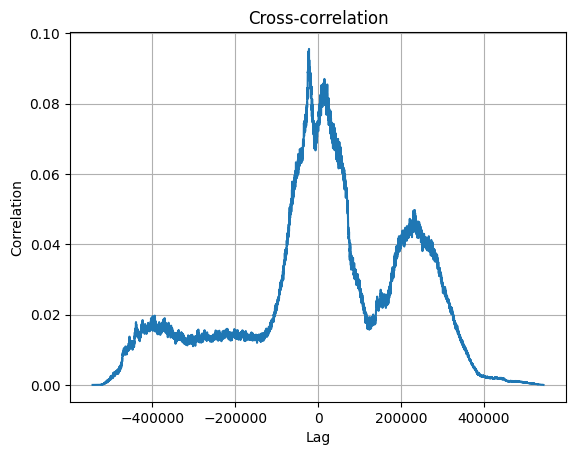

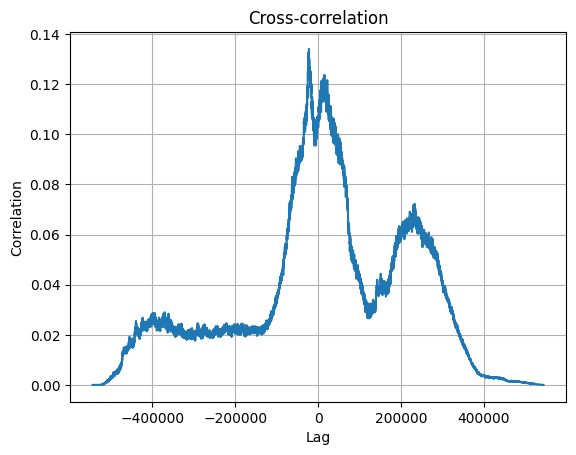

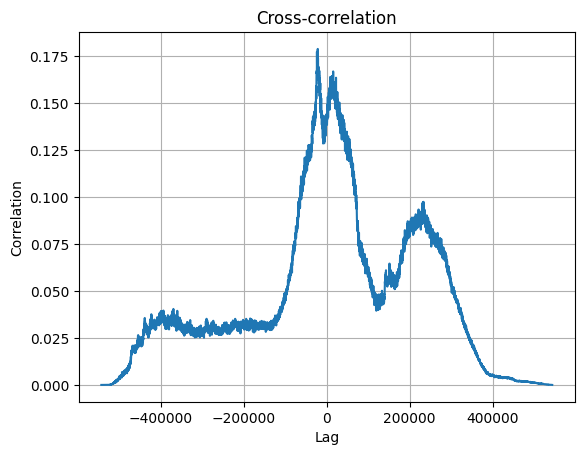

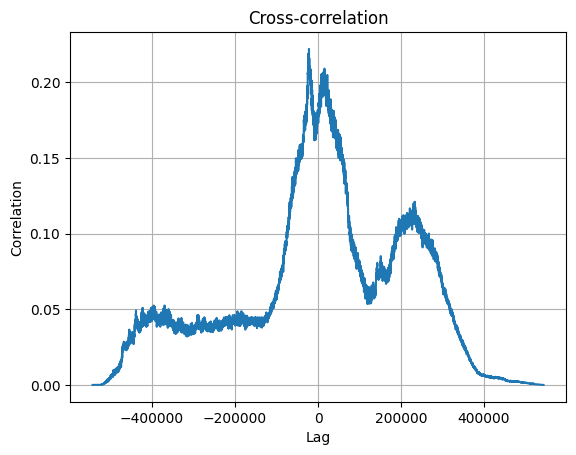

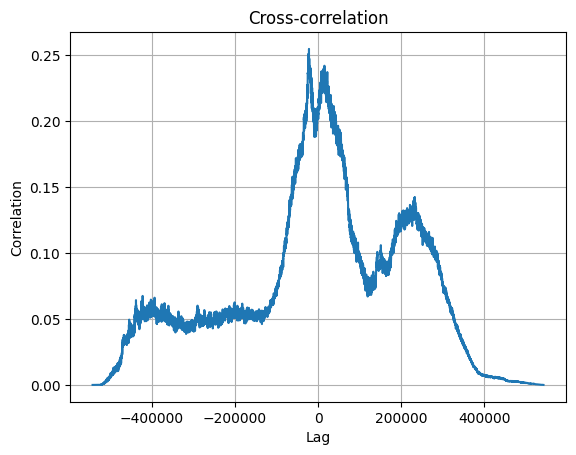

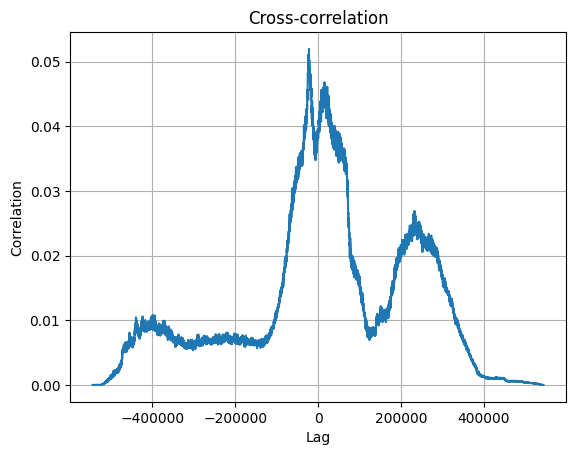

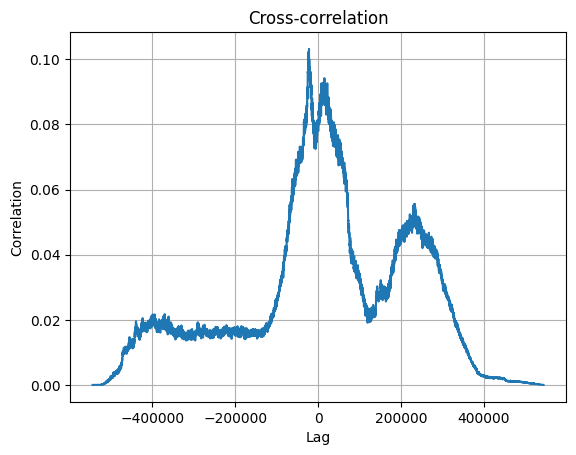

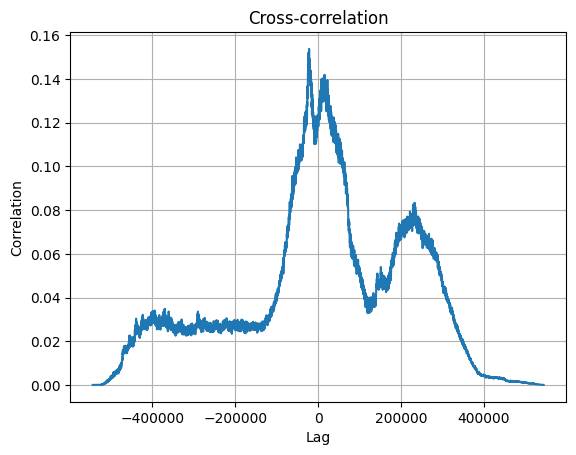

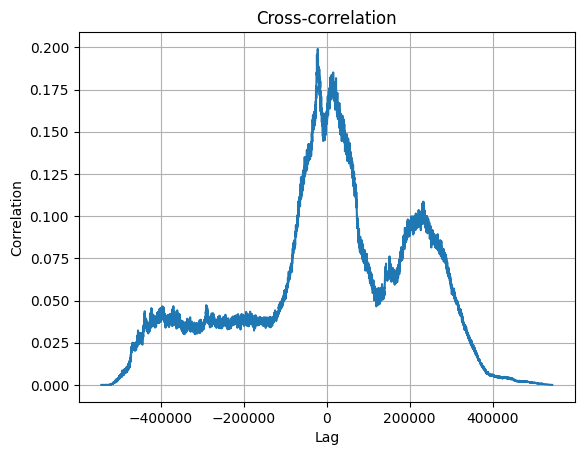

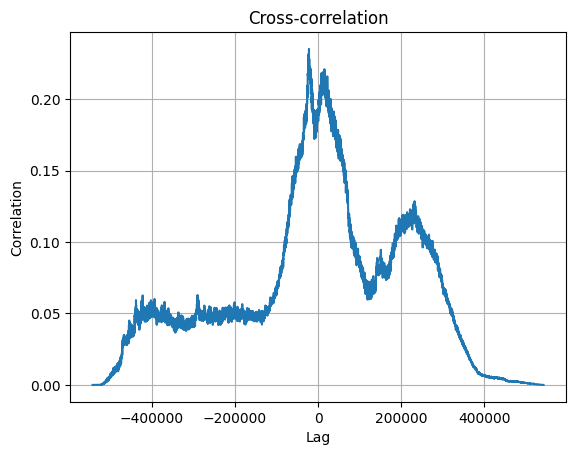

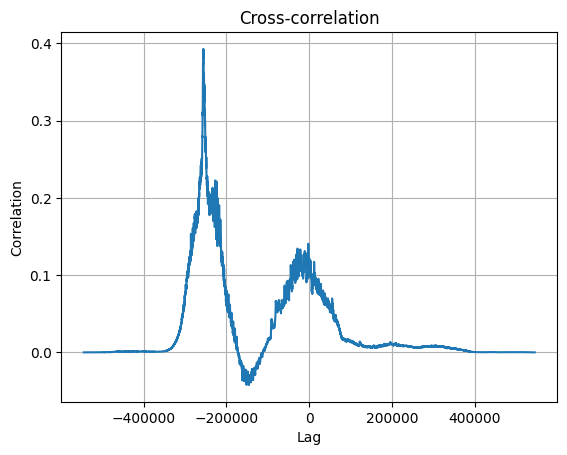

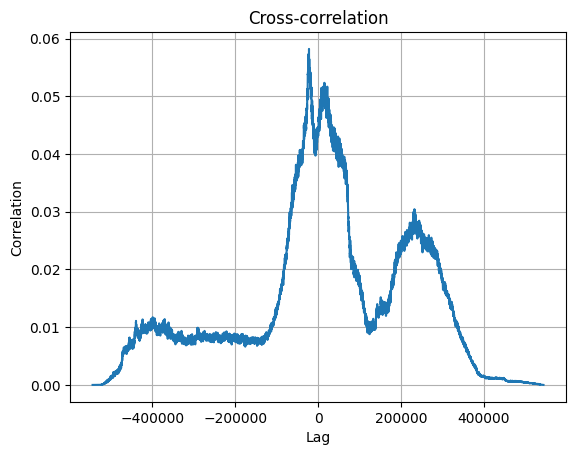

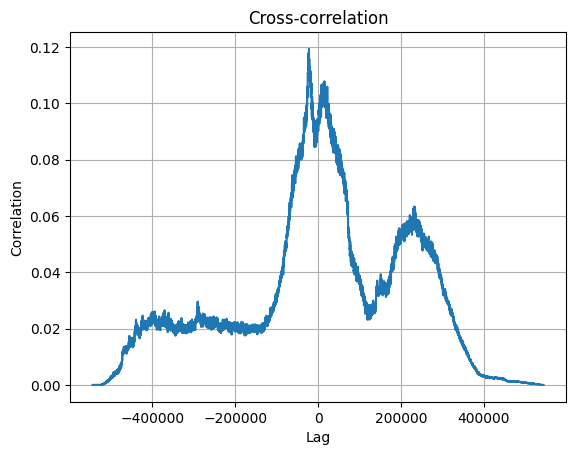

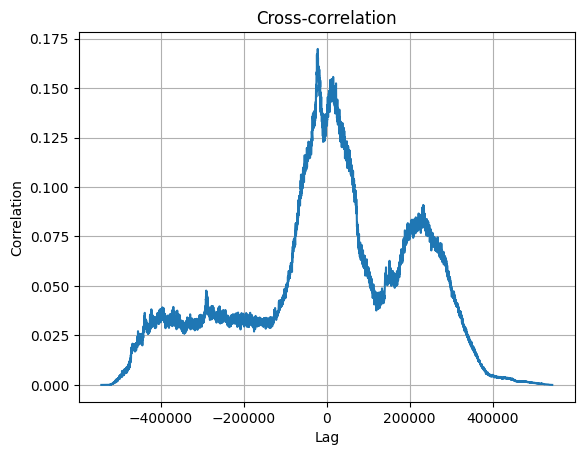

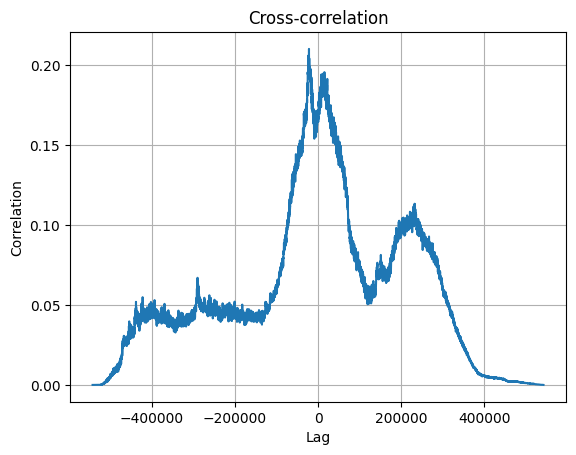

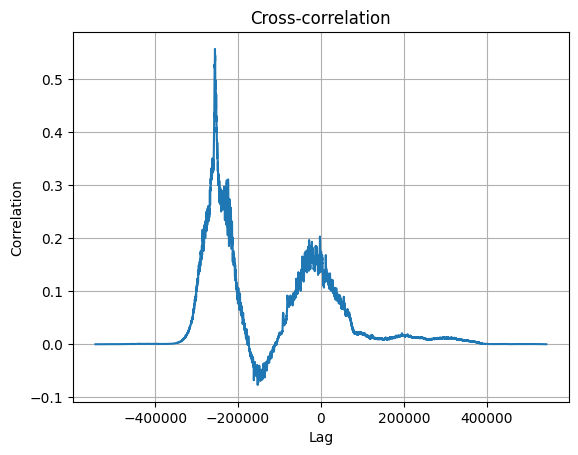

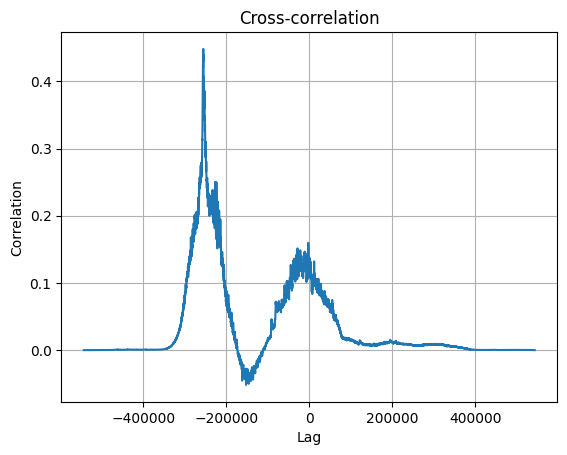

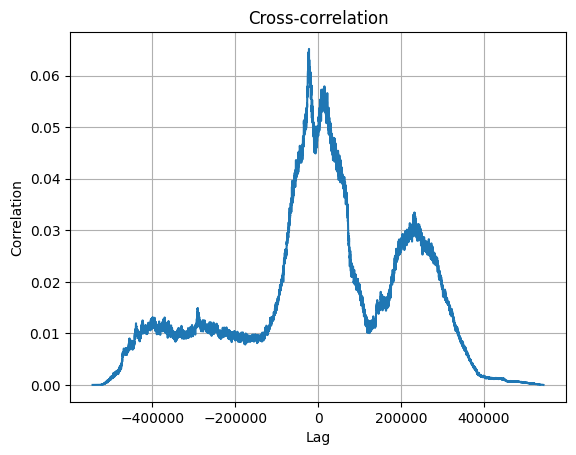

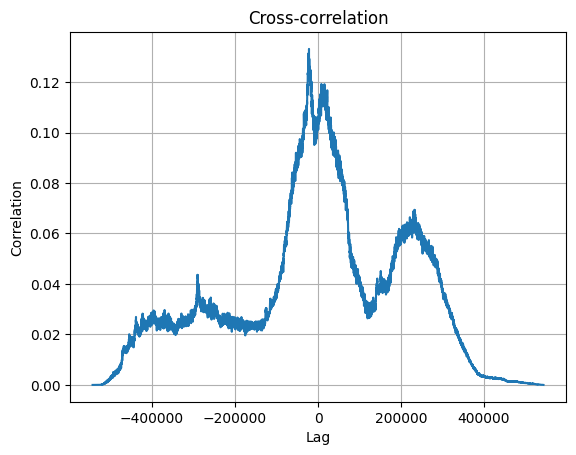

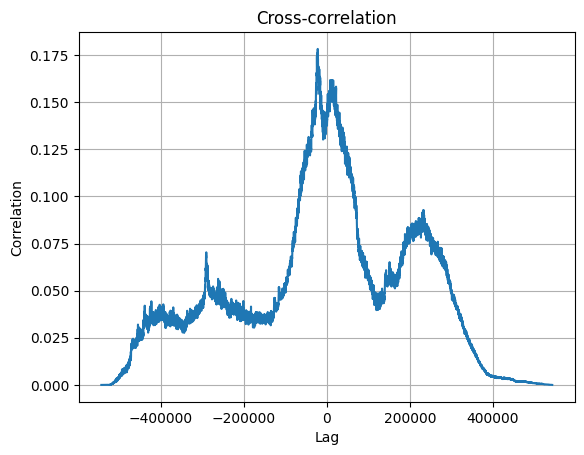

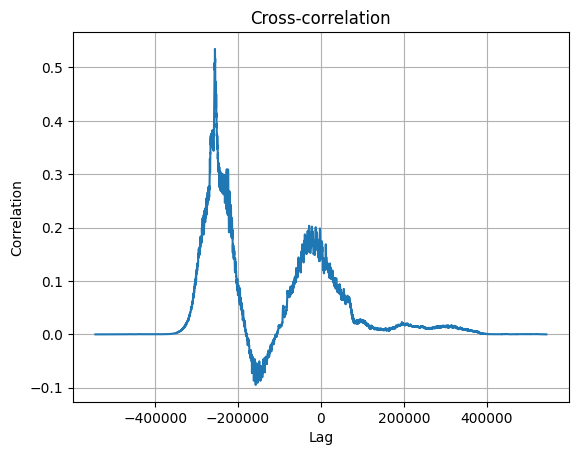

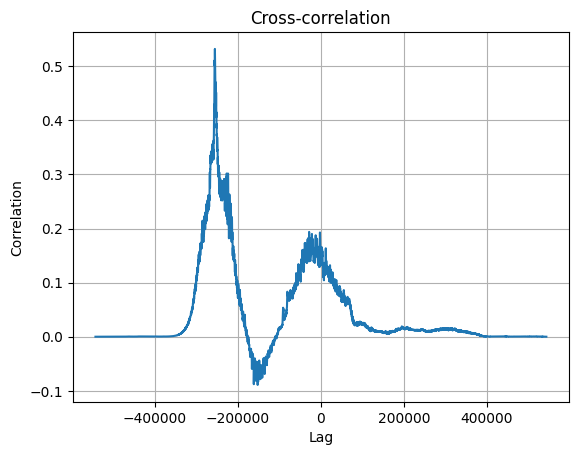

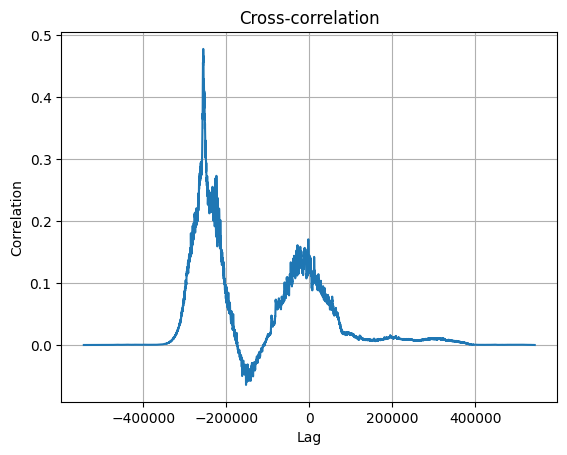

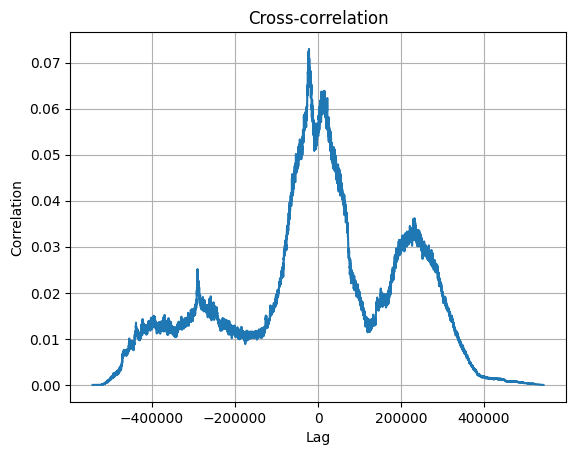

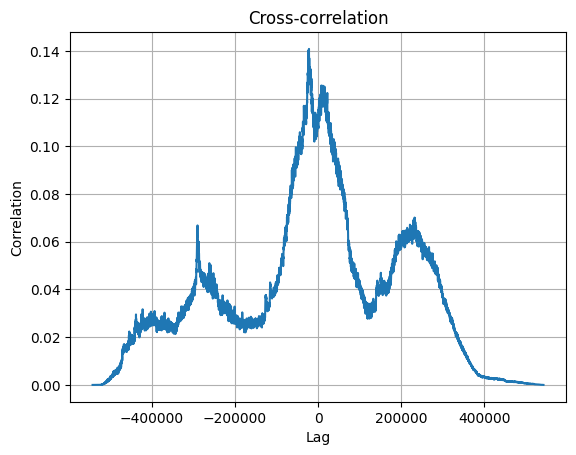

In [12]:
for index, row in df.iterrows():
    total_flux = row['FLiTs Flux']
    total_wl = row['FLiTs Wavelength']
    NH3_flux = row['FLiTs NH3 Flux']
    NH3_wl = row['FLiTs NH3 Wavelength']
    NH3_flux = np.interp(total_wl, NH3_wl, NH3_flux)
    total_flux += NH3_flux
    cc = np.correlate(NH3_flux, total_flux, mode='full')
    lags = np.arange(-len(total_flux)+1, len(NH3_flux))
    plt.plot(lags, cc)
    plt.title("Cross-correlation")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.show()